# Notebook objective
- First step before EDA:
    - Check for nulls and noise
    - Understand each feature individually

# Imports and Functions

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from typing import Dict, Union
from typing import Optional, Tuple


In [2]:
!pip3 install missingno 
!pip3 install openpyxl

In [3]:
TARGET_FEATURES = ['is_churn', 'is_keep','is_upgrade', 'churn_target', 'multiclass_target', 'churn_target']
INDEX_FEATURES = ['gym', 'user', 'communication_date']

In [4]:
from pandas import DataFrame
from typing import List
import pandas as pd
from typing import Optional

def get_features(df, target_features, index_features):
    return list(set(list(df)).difference(target_features + index_features))

def plot_histogram(df: pd.DataFrame, column: str, bins: Optional[int] = 50, figsize: Tuple[int, int] = (10,6), 
                   title: Optional[str] = None, color: Optional[str] = 'blue', kde: Optional[bool] = False) -> None:
    """
    Plot a histogram of a specified column in a DataFrame using seaborn's displot function.

    Args:
    df (pd.DataFrame): The DataFrame containing the column to plot.
    column (str): The name of the column to plot.
    bins (Optional[int], default=50): Number of histogram bins.
    figsize (Tuple[int, int], default=(10,6)): The size of the figure to display.
    title (Optional[str], default=None): The title of the plot.
    color (Optional[str], default='blue'): The color of the histogram.
    kde (Optional[bool], default=False): Whether or not to plot a gaussian kernel density estimate.

    Returns:
    None: This function doesn't return anything; it only produces a plot.
    """
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=column, bins=bins, color=color, kde=kde)
    plt.title(title if title else f'Histogram of {column}')
    plt.show()

def plot_count(df: pd.DataFrame, column: str, figsize: Tuple[int, int] = (10,6), title: Optional[str] = 'Distribution of Target Classes', 
               xlabel: Optional[str] = None, ylabel: Optional[str] = 'Count', palette: Optional[str] = 'viridis', hue = None,
               sort: Optional[bool] = False) -> None:
    """
    Plot a countplot of a specified column in a DataFrame. 

    Args:
    df (pd.DataFrame): The DataFrame containing the column to plot.
    column (str): The name of the column to plot.
    figsize (Tuple[int, int], default=(10,6)): The size of the figure to display.
    title (Optional[str], default='Distribution of Target Classes'): The title of the plot. 
    xlabel (Optional[str], default=None): The label of the x-axis. If not provided, the column name is used.
    ylabel (Optional[str], default='Count'): The label of the y-axis.
    palette (Optional[str], default='viridis'): The color palette to use.
    sort (Optional[bool], default=False): Whether to sort the categories by count.

    Returns:
    None: This function doesn't return anything; it only produces a plot.
    """
    plt.figure(figsize=figsize)
    if sort:
        order = df[column].value_counts().index
    else:
        order = None
    ax = sns.countplot(data=df, x=column, palette=palette, order=order, hue=hue)
    plt.title(title)
    
    # If xlabel is not provided, use the column name
    if xlabel is None:
        xlabel = column
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Rotate x-axis labels
    plt.xticks(rotation=90)
    
    # Annotating the count on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points')
    
    plt.show()


def get_numerical_features(df: pd.DataFrame) -> List[str]:
    """
    Get the list of numerical features in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame.

    Returns:
    List[str]: The list of numerical features.
    """
    return df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def get_categorical_features(df: pd.DataFrame) -> List[str]:
    """
    Get the list of categorical features in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame.

    Returns:
    List[str]: The list of categorical features.
    """
    return df.select_dtypes(include=['object']).columns.tolist()

def add_labels(df: DataFrame) -> DataFrame:
    """
    Assigns a label to each row in a DataFrame based on the conditions of 'is_churn', 'is_keep', and 'is_upgrade'.

    Parameters:
    df (DataFrame): The DataFrame that needs labels. 
    It should have 'is_churn', 'is_keep', and 'is_upgrade' columns which are expected to be boolean.

    Returns:
    DataFrame: The original DataFrame with an additional 'multiclass_target' column which contains the labels.
    """

    df['multiclass_target'] = df['is_churn']*1 + df['is_keep']*0 + df['is_upgrade']*2
    df.rename(columns={'is_churn': 'churn_target'}, inplace=True)
    df = df.drop(['is_keep', 'is_upgrade'], axis=1)
    return df

# Load data

- The "train.xlxs" here is the past user's data
- The "submission.xlsx" is the "application" file you sent to me.

In [5]:
train_data = pd.read_excel('../data/raw/train.xlsx')
submission_data = pd.read_excel('../data/raw/submission.xlsx')
train_data

,communication_date,gym,gym_category,gym_days_since_first_visit,gym_last_60_days_visits,gyms_5km,is_churn,is_keep,is_upgrade,user,user_age,user_billings,user_days_since_first_billing,user_days_since_first_gym_visit,user_days_since_first_visit,user_last_60_days_visit_share,user_last_60_days_visits,user_lifetime_visit_share,user_lifetime_visits,user_plan
0,2021-10-25,0,bodybuilding,472,3751,35,0,1,0,0,50,13,1833.0,346,1833,5.263158e+15,19,1.170213e+16,94.0,Silver
1,2021-06-20,1,not found,2176,357,7,0,1,0,1,45,87,2608.0,54,1719,1.000000e+00,2,6.153846e+15,325.0,Basic II
2,2021-10-25,2,bodybuilding,895,3132,41,0,1,0,2,27,9,271.0,264,271,1.162791e+16,43,1.206030e+16,199.0,Basic I
3,2021-10-25,3,bodybuilding,896,4775,42,0,1,0,3,29,9,271.0,268,271,1.627907e+16,43,1.557789e+16,199.0,Basic I
4,2021-12-12,4,not found,1516,503,65,0,0,1,4,22,20,729.0,726,726,1.000000e+00,29,1.000000e+00,119.0,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31256,2021-12-04,19,not found,144,14979,28,0,0,1,31256,22,2,25.0,24,24,2.500000e-01,4,2.500000e-01,4.0,Silver
31257,2021-12-04,19,not found,144,14979,28,1,0,0,31257,66,1,19.0,19,19,1.000000e+00,1,1.000000e+00,1.0,Silver
31258,2021-12-11,109,bodybuilding,1062,1466,69,0,1,0,31258,42,1,25.0,12,24,2.500000e-01,8,2.500000e-01,8.0,Silver
31259,2022-01-17,50,crossfit,1500,780,30,0,1,0,31259,37,3,56.0,55,55,5.625000e+03,16,5.625000e+03,16.0,Silver


In [6]:
submission_data

,user,gym,user_plan,user_last_60_days_visits,user_days_since_first_billing,gym_category,user_lifetime_visits,user_days_since_first_visit,user_lifetime_visit_share,user_days_since_first_gym_visit,gyms_5km,gym_last_60_days_visits,gym_days_since_first_visit,user_billings,user_last_60_days_visit_share,user_age
0,31261,522705,Silver,16,1450,not found,86,1450,3.255814e+16,90,37,394,172,32,8.125000e+03,71
1,31262,522705,Silver,12,946,not found,40,903,7.500000e+01,48,37,394,172,26,2.500000e-01,32
2,31263,512514,Silver,4,1079,bodybuilding,202,811,1.980198e+16,219,4,1052,246,33,5.000000e-01,44
3,31264,529403,Basic I,28,1100,bodybuilding,185,1097,1.621622e+16,93,26,4744,137,22,7.142857e+15,63
4,31265,502599,Silver,10,108,swim,28,87,3.571429e+15,49,26,830,288,6,1.000000e-01,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,36812,509753,Basic I,8,57,bodybuilding,8,51,1.250000e+02,51,12,8696,265,2,1.250000e+02,61
5552,36813,528287,Basic I,1,41,bodybuilding,1,14,1.000000e+00,14,0,2641,152,3,1.000000e+00,54
5553,36814,509753,Basic I,7,25,bodybuilding,7,18,1.000000e+00,18,12,8696,265,1,1.000000e+00,30
5554,36815,528287,Basic I,2,19,bodybuilding,2,19,1.000000e+00,19,0,2641,152,1,1.000000e+00,43


In [7]:
# check which columns is different
set(train_data).difference(submission_data)

{'communication_date', 'is_churn', 'is_keep', 'is_upgrade'}

# Preprocessing

## Features for EDA

In [8]:
train_data['years_usage'] = train_data['user_billings']/12
train_data.rename(columns={'user_billings': 'months_usage'}, inplace=True)
train_data.head()

,communication_date,gym,gym_category,gym_days_since_first_visit,gym_last_60_days_visits,gyms_5km,is_churn,is_keep,is_upgrade,user,...,months_usage,user_days_since_first_billing,user_days_since_first_gym_visit,user_days_since_first_visit,user_last_60_days_visit_share,user_last_60_days_visits,user_lifetime_visit_share,user_lifetime_visits,user_plan,years_usage
0,2021-10-25,0,bodybuilding,472,3751,35,0,1,0,0,...,13,1833.0,346,1833,5.263158e+15,19,1.170213e+16,94.0,Silver,1.083333
1,2021-06-20,1,not found,2176,357,7,0,1,0,1,...,87,2608.0,54,1719,1.000000e+00,2,6.153846e+15,325.0,Basic II,7.250000
2,2021-10-25,2,bodybuilding,895,3132,41,0,1,0,2,...,9,271.0,264,271,1.162791e+16,43,1.206030e+16,199.0,Basic I,0.750000
3,2021-10-25,3,bodybuilding,896,4775,42,0,1,0,3,...,9,271.0,268,271,1.627907e+16,43,1.557789e+16,199.0,Basic I,0.750000
4,2021-12-12,4,not found,1516,503,65,0,0,1,4,...,20,729.0,726,726,1.000000e+00,29,1.000000e+00,119.0,Silver,1.666667


In [9]:
list(train_data)

['communication_date',
 'gym',
 'gym_category',
 'gym_days_since_first_visit',
 'gym_last_60_days_visits',
 'gyms_5km',
 'is_churn',
 'is_keep',
 'is_upgrade',
 'user',
 'user_age',
 'months_usage',
 'user_days_since_first_billing',
 'user_days_since_first_gym_visit',
 'user_days_since_first_visit',
 'user_last_60_days_visit_share',
 'user_last_60_days_visits',
 'user_lifetime_visit_share',
 'user_lifetime_visits',
 'user_plan',
 'years_usage']

In [10]:
# train_data.years_usage.hist()


## Add Labels

In [11]:
train_data = add_labels(train_data)
train_data.multiclass_target.value_counts()

multiclass_target
0    13499
2    12401
1     5361
Name: count, dtype: int64

## Add target_name for better visualization

In [12]:
target_names = {1: 'is_churn', 0: 'is_keep', 2: 'is_upgrade'}

train_data['multiclass_target_names'] = train_data['multiclass_target'].map(target_names)

binary_target_names = {1: 'is_churn', 0: 'is_not_churn'}

train_data['churn_target_names'] = train_data['churn_target'].map(binary_target_names)

## Check null data
- Looks like we don't have null data

In [13]:
train_data.isna().sum()

communication_date                  0
gym                                 0
gym_category                        0
gym_days_since_first_visit          0
gym_last_60_days_visits             0
gyms_5km                            0
churn_target                        0
user                                0
user_age                            0
months_usage                        0
user_days_since_first_billing       8
user_days_since_first_gym_visit     0
user_days_since_first_visit         0
user_last_60_days_visit_share       0
user_last_60_days_visits            0
user_lifetime_visit_share           0
user_lifetime_visits               19
user_plan                           0
years_usage                         0
multiclass_target                   0
multiclass_target_names             0
churn_target_names                  0
dtype: int64

<Axes: >

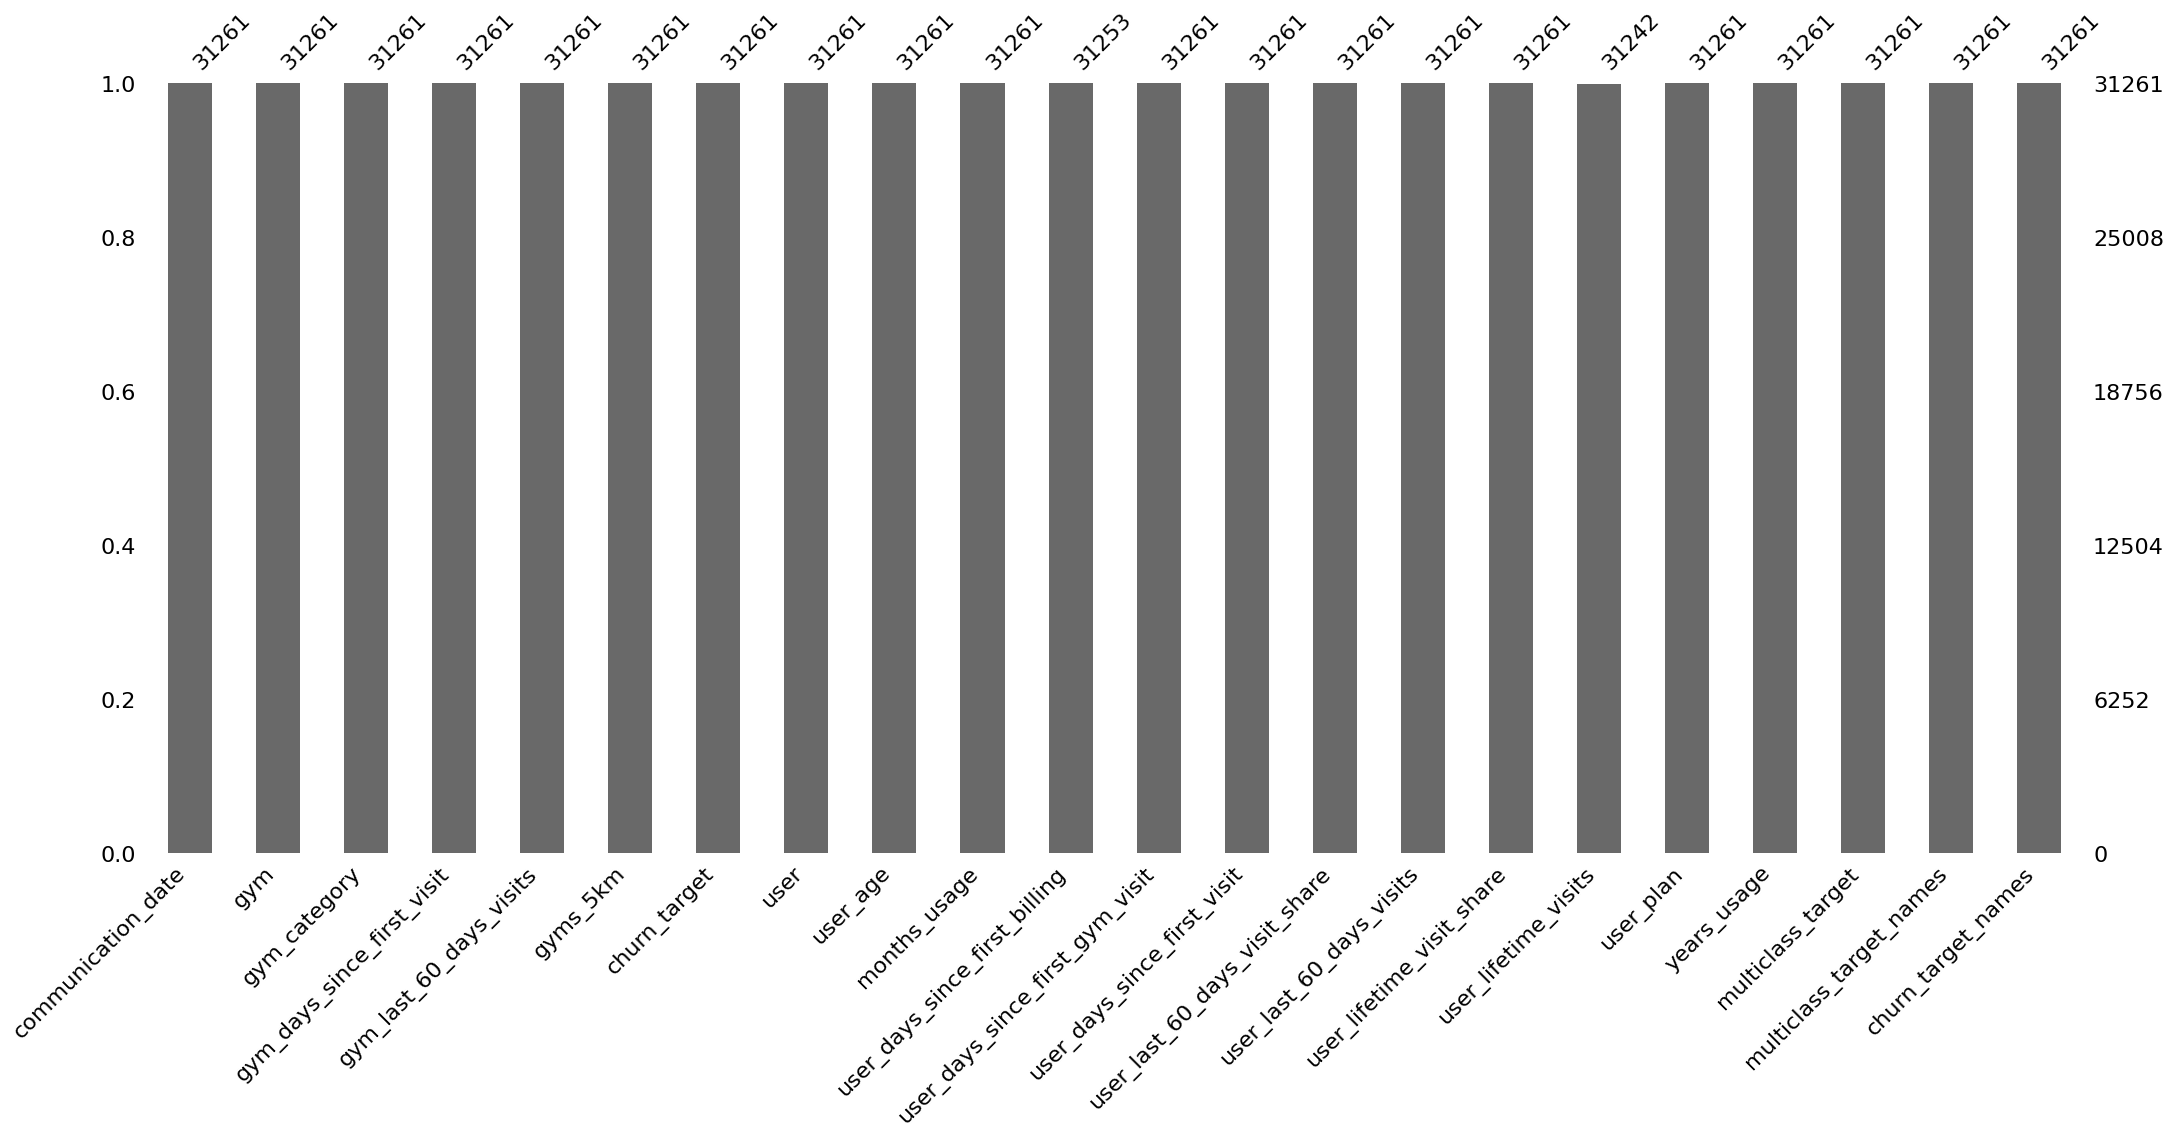

In [14]:
import missingno as msno
import pandas as pd

# Assuming df is your DataFrame
msno.bar(train_data)

## Check noise and explore each feature

### Communication date
- We have data from 2032. Which is impossible. But I will ignore it as we don't have this information in the "applications" file

In [15]:
train_data['communication_date'] = pd.to_datetime(train_data['communication_date'])


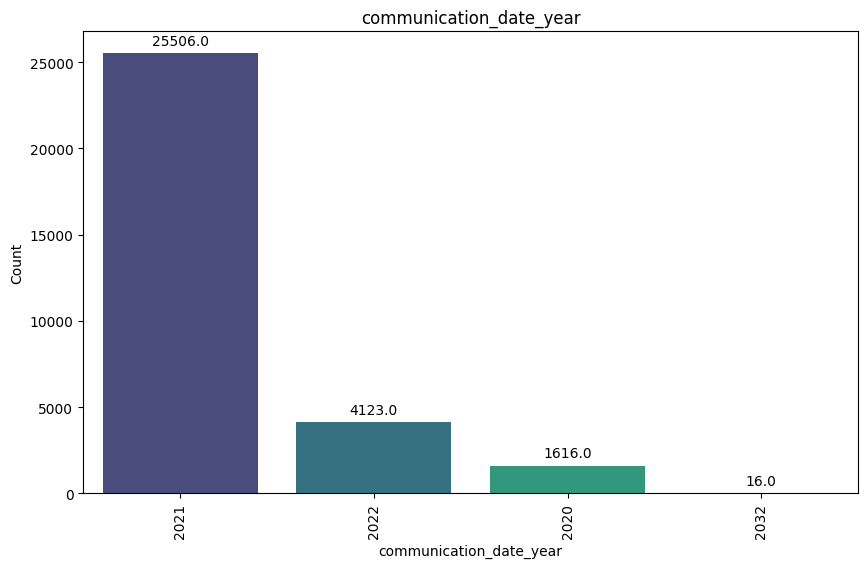

In [16]:
column_name = 'communication_date_year'

train_data['communication_date_year'] = train_data.communication_date.dt.year

plot_count(train_data, column=column_name, title=column_name, sort="True")

train_data = train_data.drop('communication_date_year', axis=1)

In [17]:
# data after 2022
train_data[train_data.communication_date.dt.year > 2022]

,communication_date,gym,gym_category,gym_days_since_first_visit,gym_last_60_days_visits,gyms_5km,churn_target,user,user_age,months_usage,...,user_days_since_first_visit,user_last_60_days_visit_share,user_last_60_days_visits,user_lifetime_visit_share,user_lifetime_visits,user_plan,years_usage,multiclass_target,multiclass_target_names,churn_target_names
1200,2032-12-12,86,bodybuilding,1292,738,27,0,1200,36,4,...,68,1.000000e+00,25,1.000000e+00,30.0,Basic I,0.333333,2,is_upgrade,is_not_churn
1201,2032-12-12,99,not found,1422,7774,33,1,1201,42,3,...,57,1.000000e+00,33,1.000000e+00,33.0,Silver,0.250000,1,is_churn,is_churn
1202,2032-12-12,347,bodybuilding,1584,1303,19,0,1202,42,4,...,66,1.785714e+16,28,1.515152e+16,33.0,Basic I,0.333333,2,is_upgrade,is_not_churn
1203,2032-12-12,348,bodybuilding,1032,1964,13,0,1203,48,2,...,51,1.000000e+00,1,1.000000e+00,1.0,Basic I,0.166667,0,is_keep,is_not_churn
1204,2032-12-12,36,bodybuilding,1213,5721,29,0,1204,18,3,...,61,3.000000e-01,10,2.727273e+15,11.0,Silver,0.250000,0,is_keep,is_not_churn
1205,2032-12-12,19,not found,144,14979,28,0,1205,21,3,...,53,6.315789e+14,19,6.315789e+14,19.0,Silver,0.250000,0,is_keep,is_not_churn
1206,2032-12-12,35,not found,716,11617,27,0,1206,64,3,...,53,5.263158e+15,19,5.263158e+15,19.0,Silver,0.250000,0,is_keep,is_not_churn
1207,2032-12-12,7,bodybuilding,1209,7661,102,0,1207,38,3,...,53,4.166667e+16,24,4.166667e+16,24.0,Silver,0.250000,0,is_keep,is_not_churn
1208,2032-12-12,65,fight,2149,2962,9,1,1208,30,1,...,13,1.000000e+00,5,1.000000e+00,5.0,Basic I,0.083333,1,is_churn,is_churn
1209,2032-12-12,349,bodybuilding,55,878,3,0,1209,46,3,...,62,9.666667e+15,30,9.354839e+15,31.0,Basic I,0.250000,2,is_upgrade,is_not_churn


### Gym category

- Looks like we have too few data for yoga, run and personal. Maybe we can join to a unique category 'others'

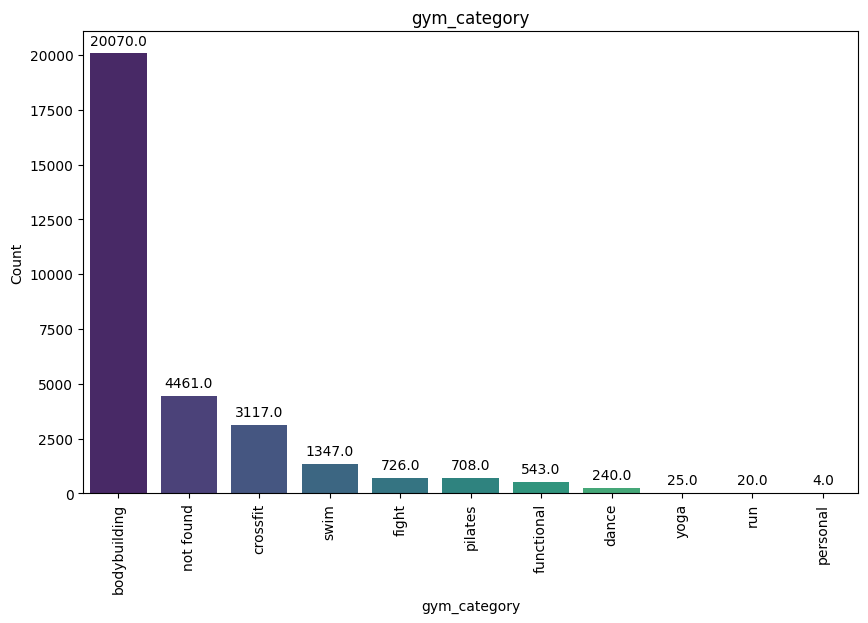

In [18]:
column_name = 'gym_category'
plot_count(train_data, column=column_name, title=column_name, sort="True")

### gym_days_since_first_visit

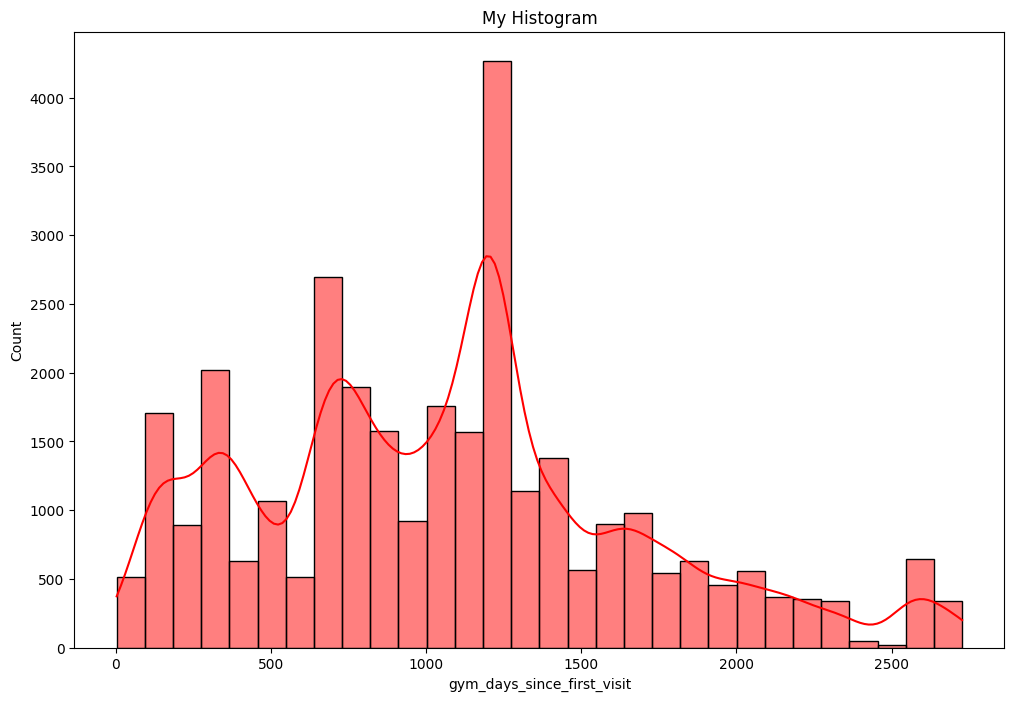

In [19]:
plot_histogram(train_data, 'gym_days_since_first_visit', bins=30, figsize=(12,8), title='My Histogram', color='red', kde=True)


### months_usage

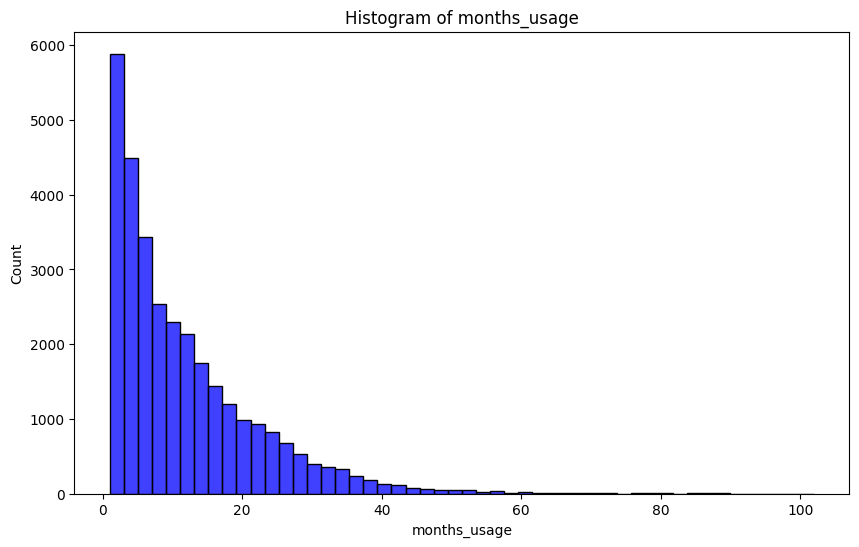

In [20]:
plot_histogram(train_data, 'months_usage')

### years_usage

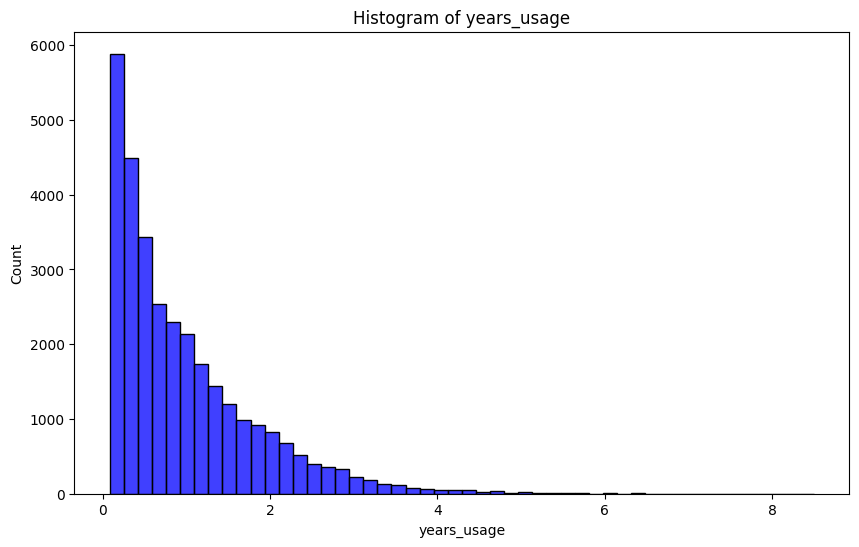

In [21]:
plot_histogram(train_data, 'years_usage')

### gym_last_60_days_visits

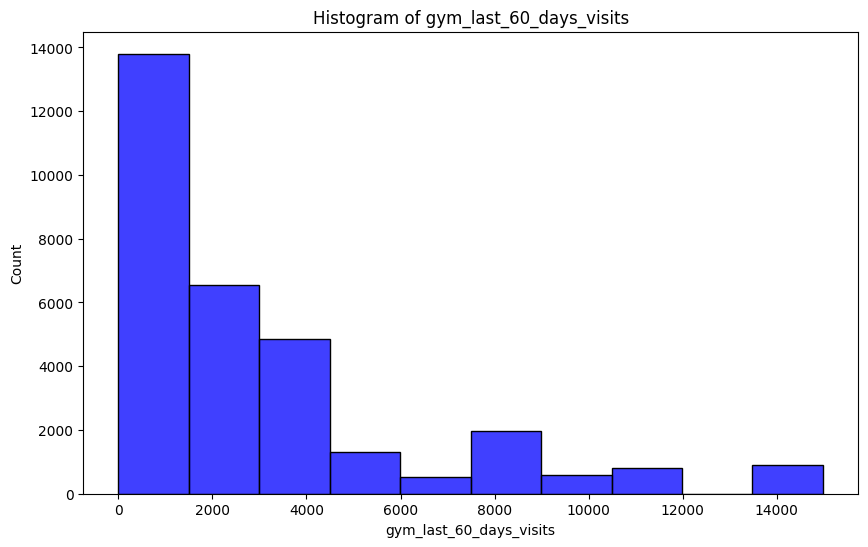

In [22]:
plot_histogram(train_data, 'gym_last_60_days_visits', bins=10)

### gyms_5km

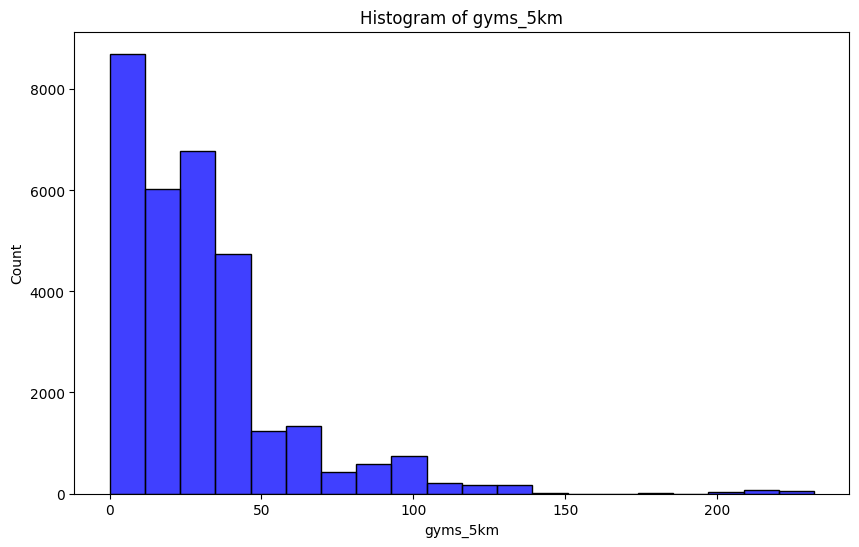

In [23]:
plot_histogram(train_data, 'gyms_5km', bins=20)

### user_days_since_first_billing

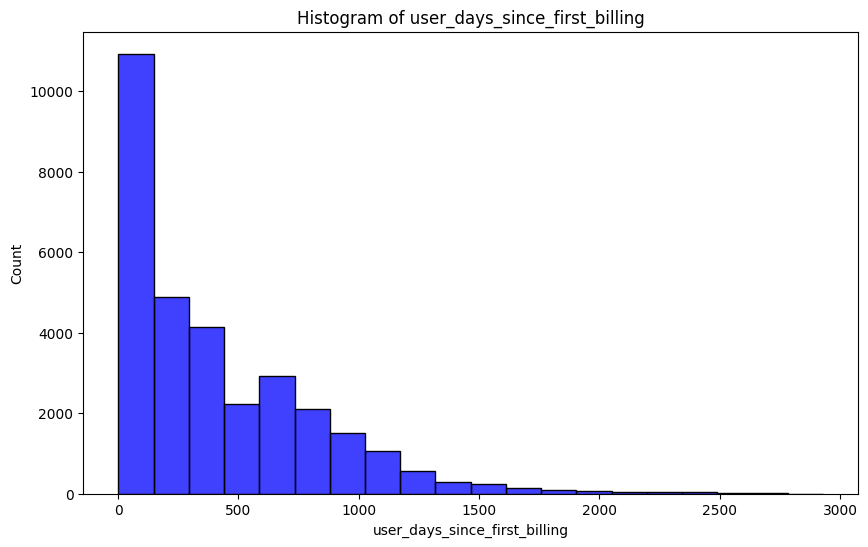

In [24]:
plot_histogram(train_data, 'user_days_since_first_billing', bins=20)

<Axes: >

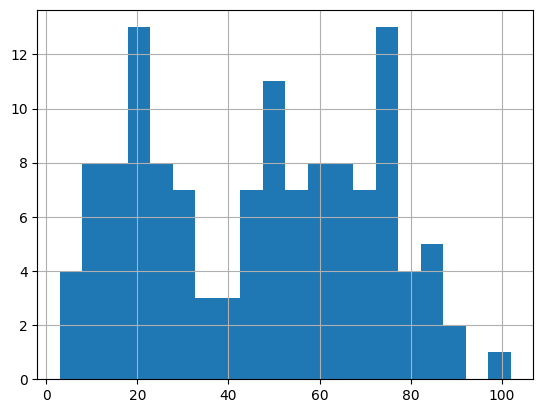

In [25]:
train_data[train_data['user_days_since_first_billing'] > 2000]['months_usage'].hist(bins=20)

### user_days_since_first_gym_visit

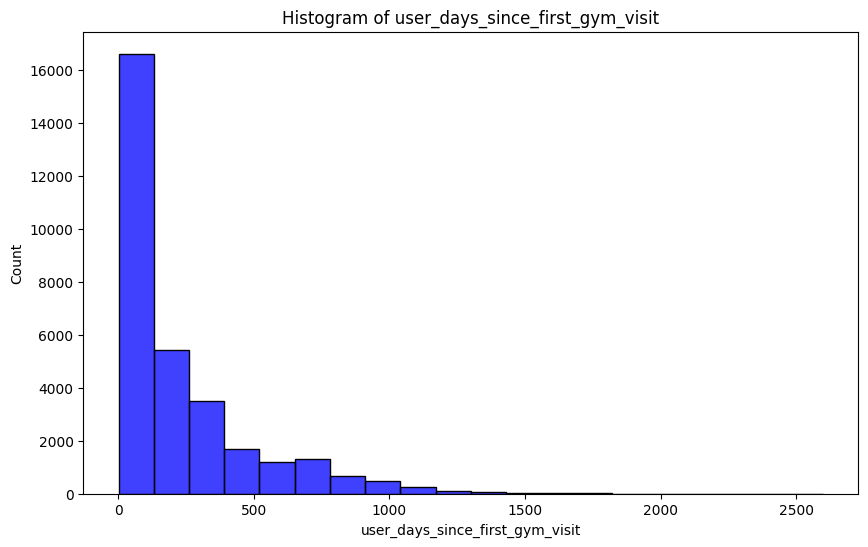

In [26]:
plot_histogram(train_data, 'user_days_since_first_gym_visit', bins=20)

### user_days_since_first_visit

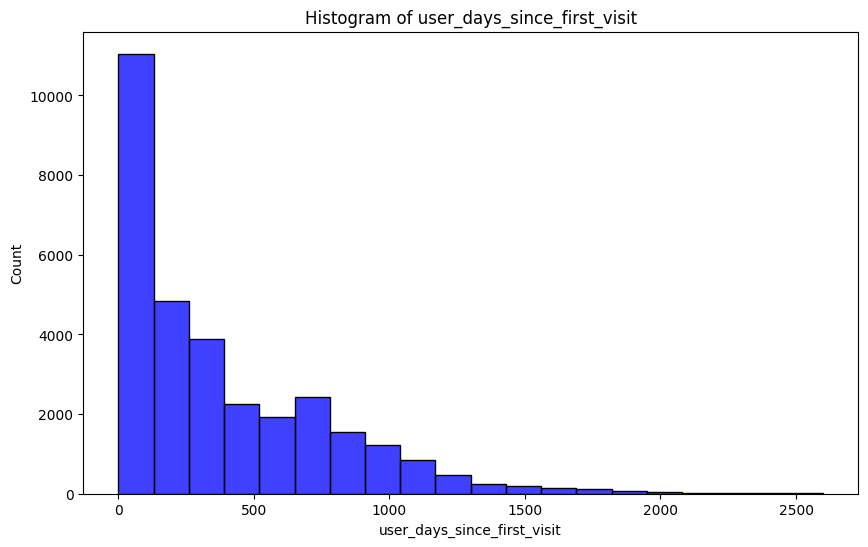

In [27]:
plot_histogram(train_data, 'user_days_since_first_visit', bins=20)

In [28]:
df[]

SyntaxError: invalid syntax (1951995059.py, line 1)

### user_last_60_days_visit_share

- skewed distribution

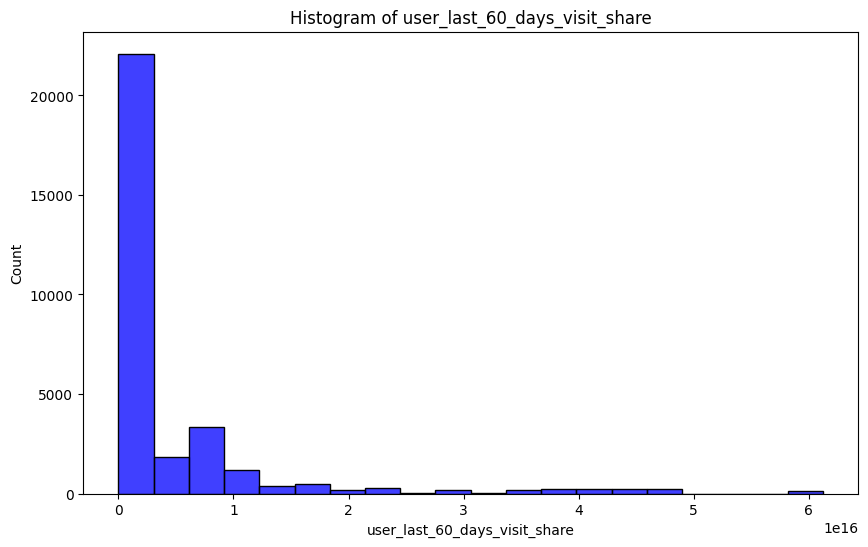

In [29]:
plot_histogram(train_data, 'user_last_60_days_visit_share', bins=20)

### user_last_60_days_visits

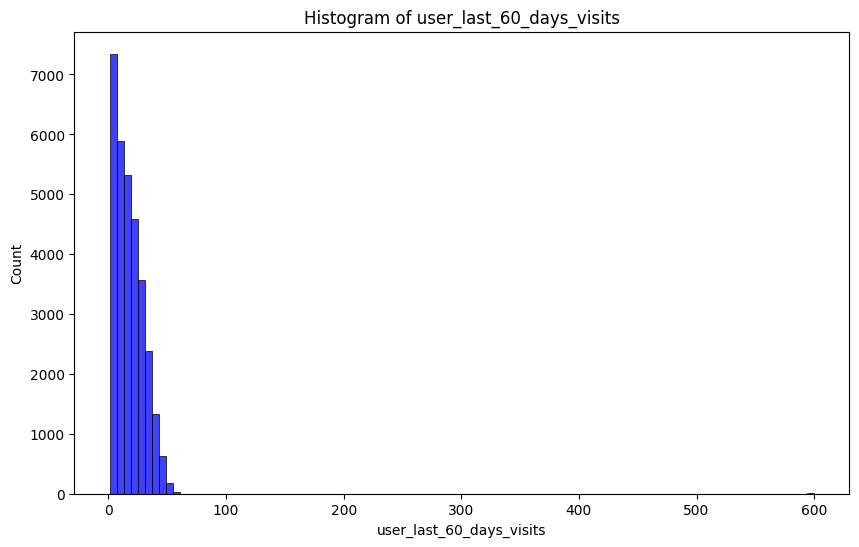

In [30]:
plot_histogram(train_data, 'user_last_60_days_visits', bins=100)

In [31]:
## looks like it is a typoe of 600 to 60
train_data.loc[train_data['user_last_60_days_visits']>100, 'user_last_60_days_visits'] = 60

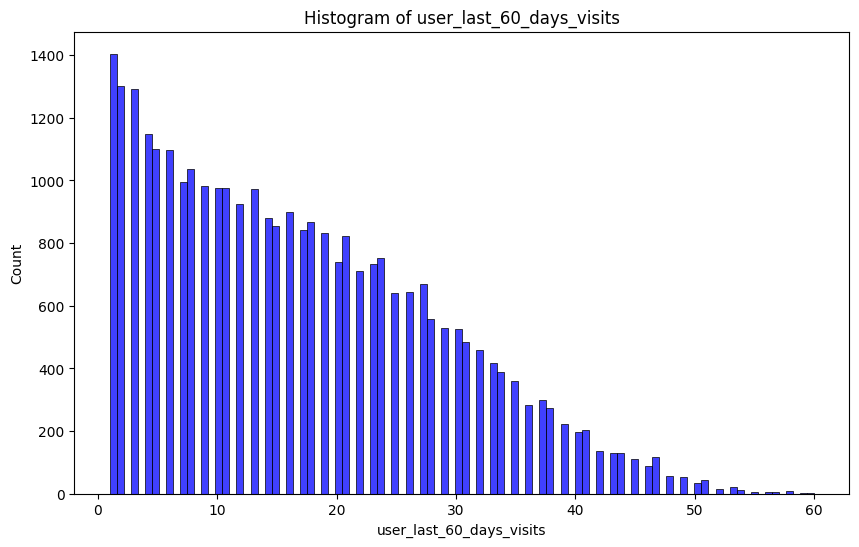

In [32]:
plot_histogram(train_data, 'user_last_60_days_visits', bins=100)

### user_lifetime_visit_share

- skewed distribution

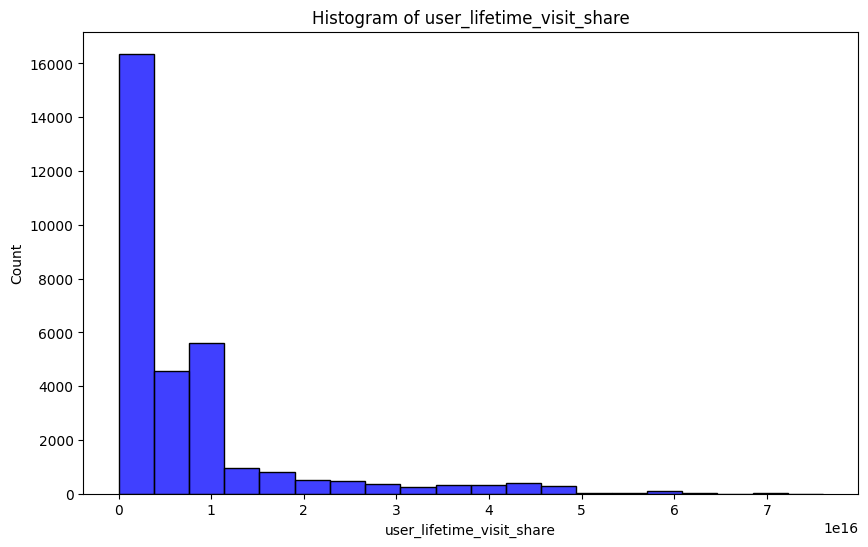

In [33]:
plot_histogram(train_data, 'user_lifetime_visit_share', bins=20)

### user_lifetime_visits

- skewed distribution

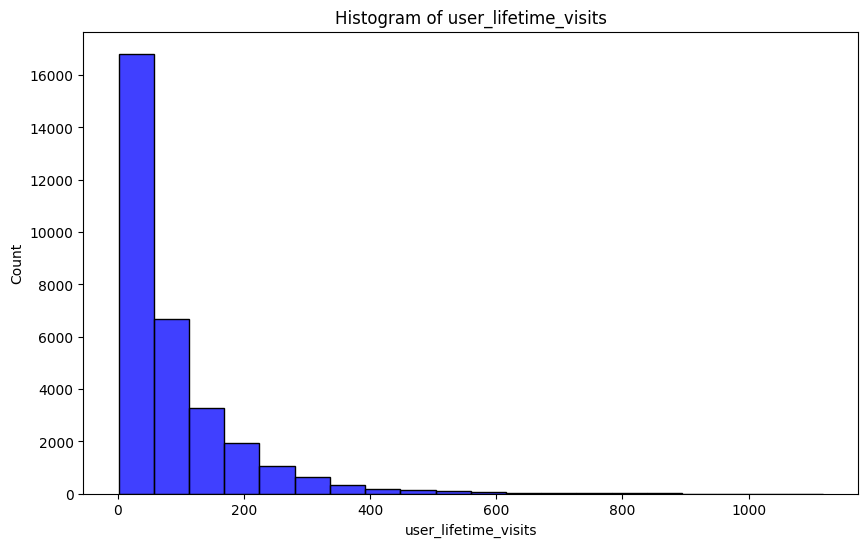

In [34]:
plot_histogram(train_data, 'user_lifetime_visits', bins=20)

### user_plan

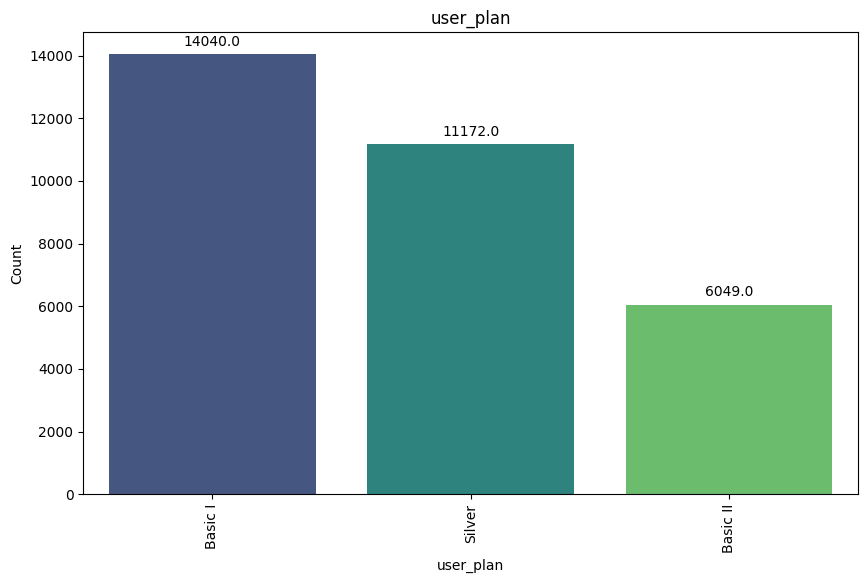

In [35]:
column_name = 'user_plan'
plot_count(train_data, column=column_name, title=column_name, sort="True")

### gym_days_since_first_visit

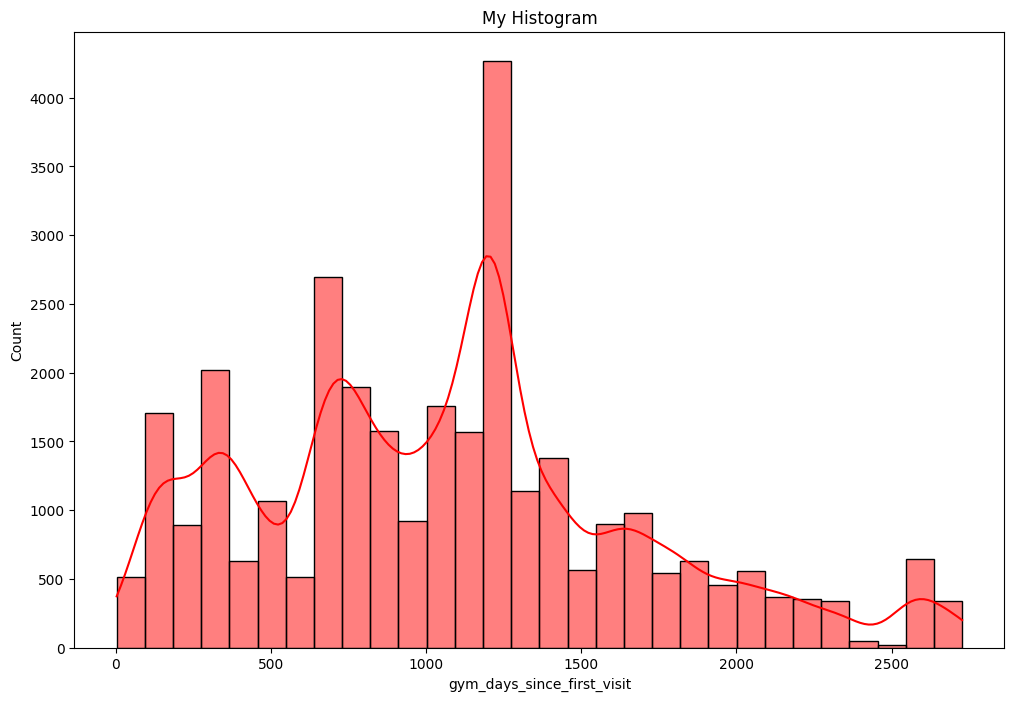

In [36]:
plot_histogram(train_data, 'gym_days_since_first_visit', bins=30, figsize=(12,8), title='My Histogram', color='red', kde=True)


### months_usage

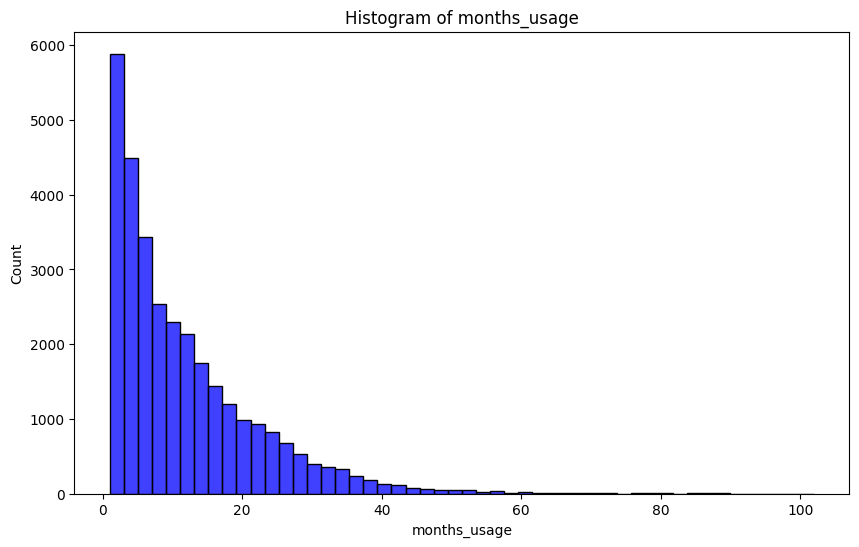

In [37]:
plot_histogram(train_data, 'months_usage')

### years_usage

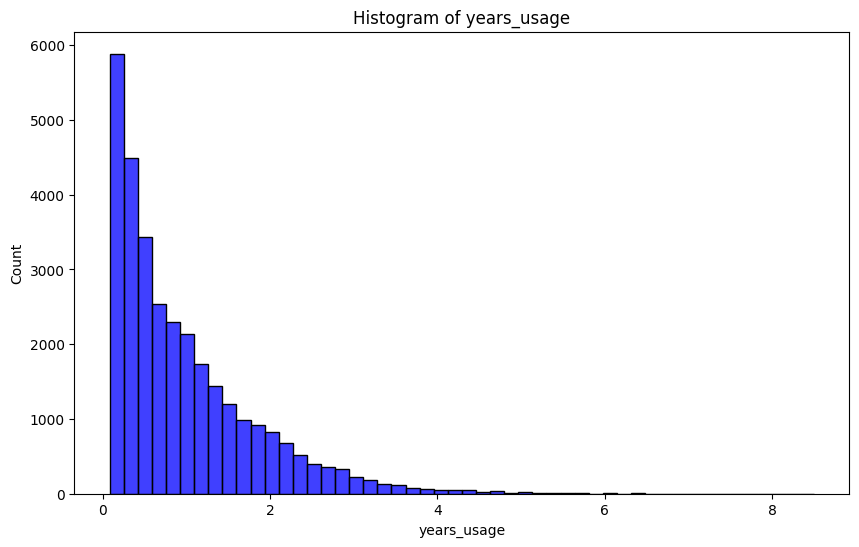

In [38]:
plot_histogram(train_data, 'years_usage')

### gym_last_60_days_visits

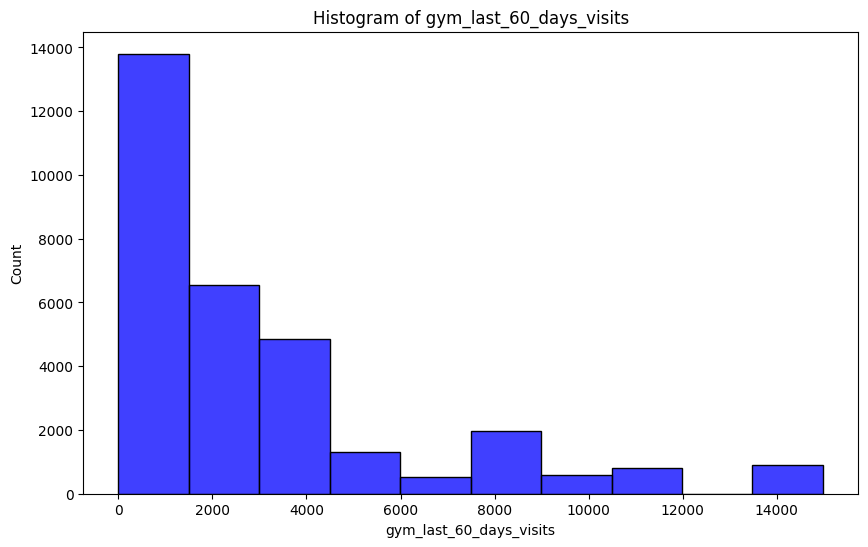

In [39]:
plot_histogram(train_data, 'gym_last_60_days_visits', bins=10)

### gyms_5km

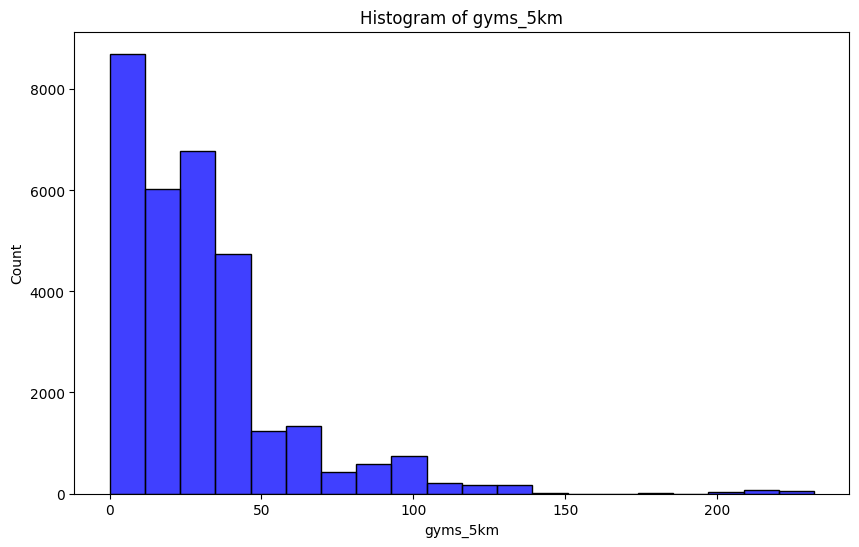

In [40]:
plot_histogram(train_data, 'gyms_5km', bins=20)

### user_days_since_first_billing

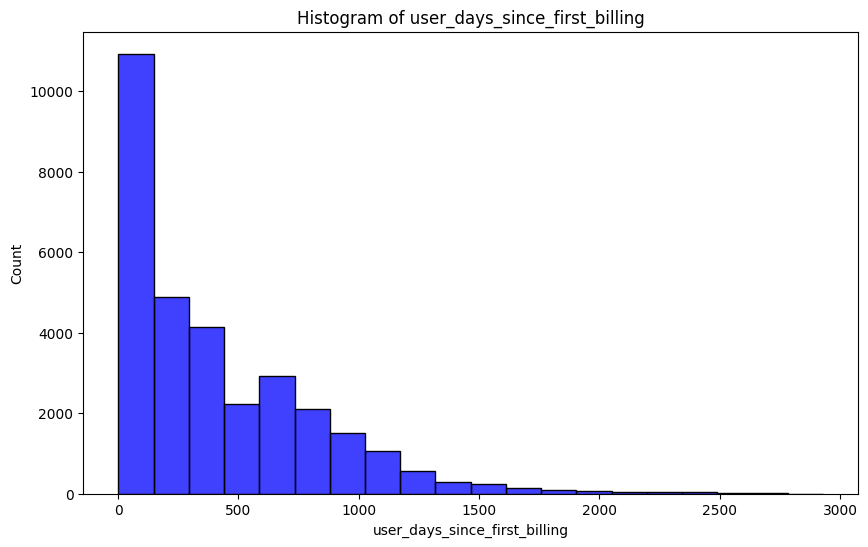

In [41]:
plot_histogram(train_data, 'user_days_since_first_billing', bins=20)

### user_days_since_first_gym_visit

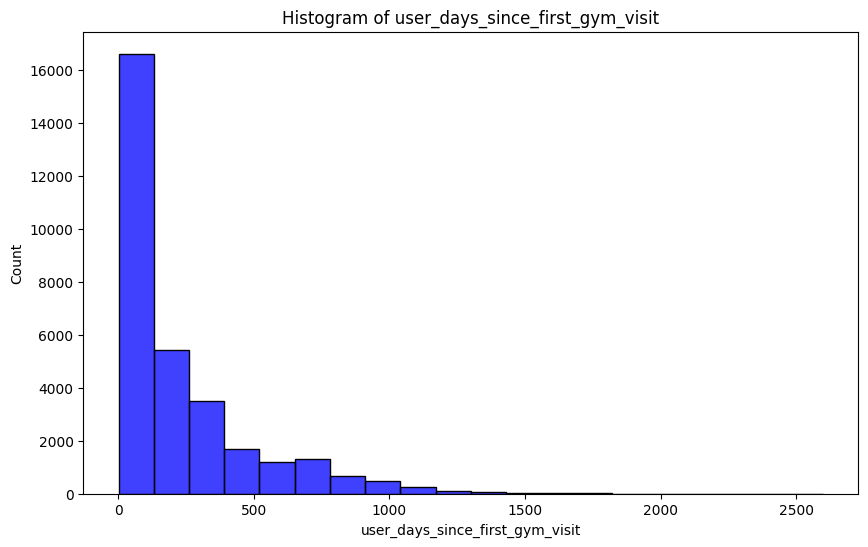

In [42]:
plot_histogram(train_data, 'user_days_since_first_gym_visit', bins=20)

### user_days_since_first_visit

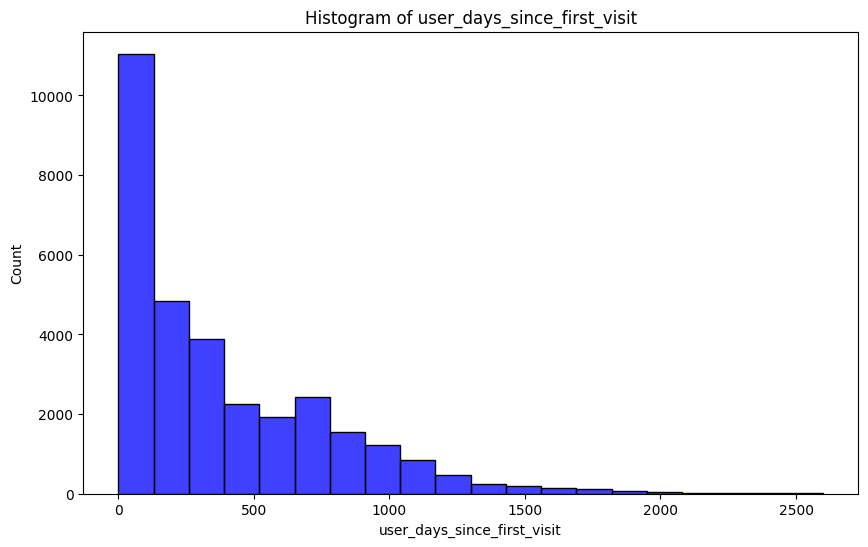

In [43]:
plot_histogram(train_data, 'user_days_since_first_visit', bins=20)

### user_last_60_days_visit_share

- skewed distribution
- Does the 'gym network' contains the target gym?

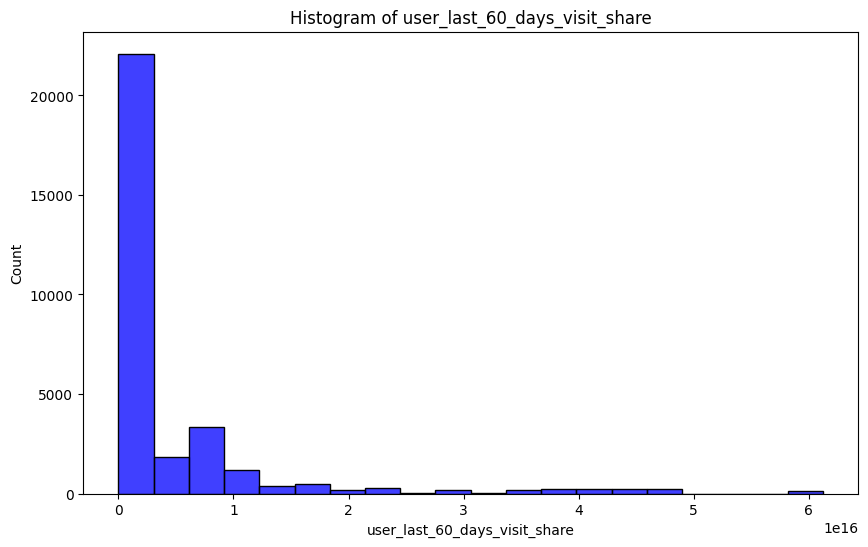

In [44]:
plot_histogram(train_data, 'user_last_60_days_visit_share', bins=20)

### user_last_60_days_visits

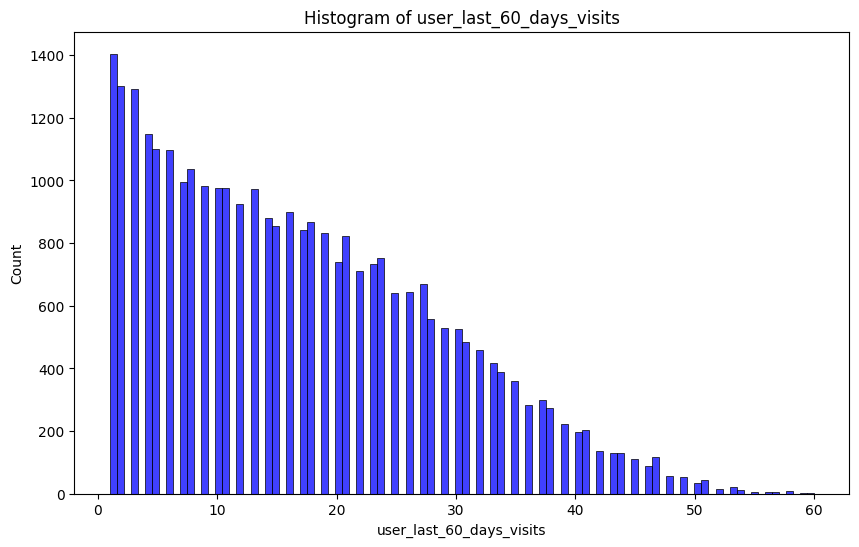

In [45]:
plot_histogram(train_data, 'user_last_60_days_visits', bins=100)

In [46]:
## looks like it is a typoe of 600 to 60
train_data.loc[train_data['user_last_60_days_visits']>100, 'user_last_60_days_visits'] = 60

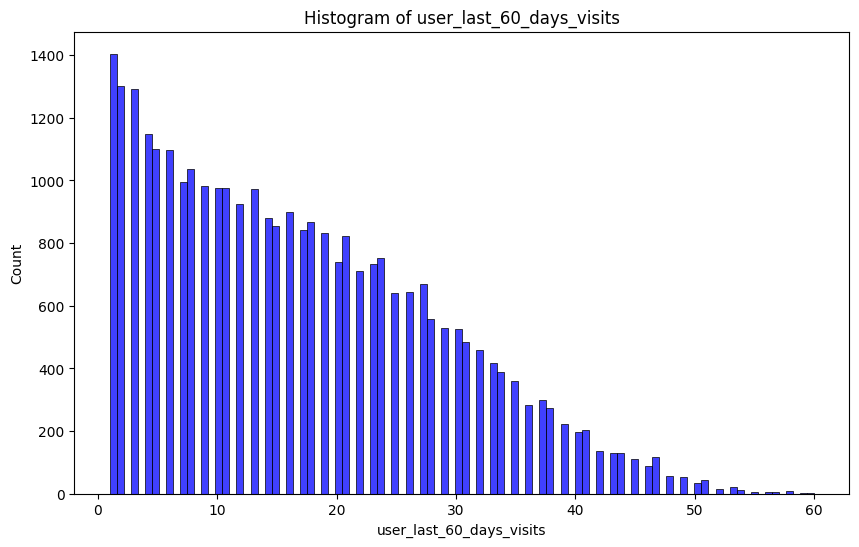

In [47]:
plot_histogram(train_data, 'user_last_60_days_visits', bins=100)

### user_lifetime_visit_share

- super skewed distribution

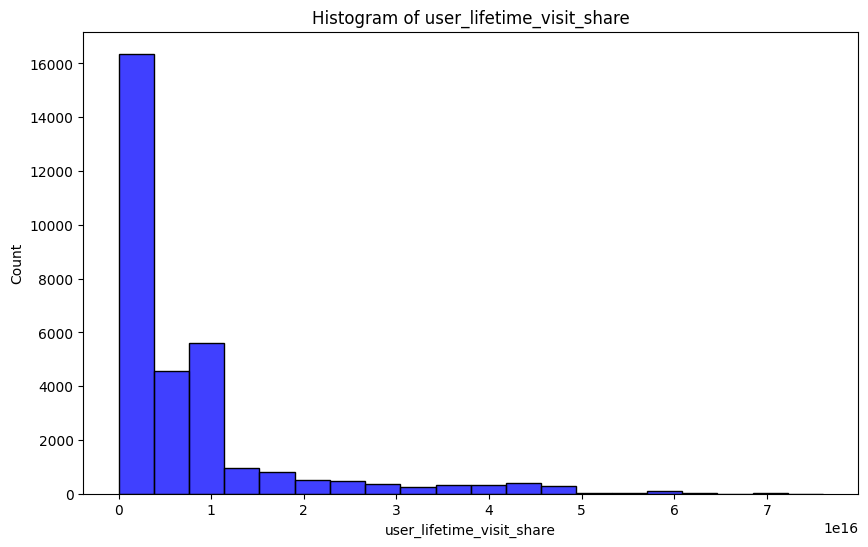

In [48]:
plot_histogram(train_data, 'user_lifetime_visit_share', bins=20)

### user_lifetime_visits

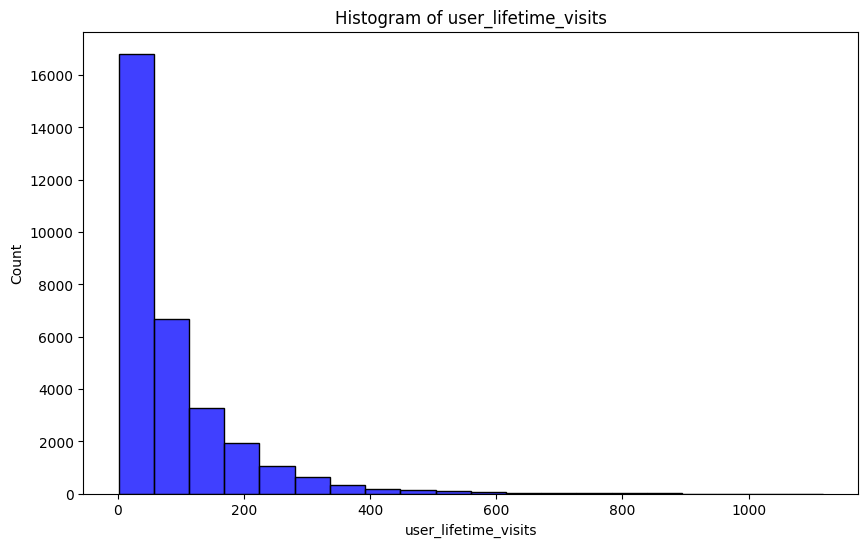

In [49]:
plot_histogram(train_data, 'user_lifetime_visits', bins=20)